In [1]:
from utils.models import runfullseasonpredictor
from utils.mining_data_tb import getnbafromoddsportal
from utils.mining_data_tb import getnbafrommassey
from utils.sql_tb import nbacleantomysql
from utils.folders_tb import opennbacsv
from utils.folders_tb import openmodelresults
from utils.sql_tb import getpredictiontablefromsql
from utils.sql_tb import getfullnbatablefromsql
from utils.models import gamepredictor
from utils.models import runteamseasonpredictor
from utils.models import multimodelcomparision
from utils.models import runfullseasonpredictor


# <u> Collect data </u>

This project is obtained from two websites via webscraping, <u>https://masseyratings.com/nba/games </u> and <u>https://www.oddsportal.com/basketball/usa/nba/results/#/page/1 </u>.

Each game is sent to a json dictionary in the DATA folder and joined together with the relevant information from each page into a file called <u>nbaclean.csv</u> which is also sent to mySQL into the table named <u>daniel_walker</u>.

### **Beware, each may take up to a few hours to complete.**


In [ ]:
# BEWARE, THESE FUNCTIONS TAKE HOURS TO COMPLETE, to avoid unexpected errors the dictionaries made to jsons are set up to use new files instead of overwriting the existing ones

getnbafrommassey('https://masseyratings.com/nba/games?dt=20210601', maxdate=(datetime.today().strftime('%Y%m%d')))

getnbafromoddsportal(2)

In [2]:
nbacleantomysql("nbaclean.csv")

nbaclean.csv appended to daniel_walker table in database


'Done'

# <u> Game Prediction</u>

To make the first prediction, the program is given a team name, the game number that needs to be predicted, the regressor to be used and a variable.

The function will print the useful information regarding the game, the prediction, and also the result to see if the prediction was correct.


### **The function can also be called from the Streamlit app.**

In [2]:
Team = "Utah Jazz"
Gamenumber = 40
regressor = "DecisionTreeRegressor"
eon = "mse" #eon means ESTIMATOR (used in RandomForestRegressor, recommend 100), CRITERION (used in DecisionTreeRegressor, recommend mse) or
        #N_NEIGHBORS (used in KNeighborsRegressor, recommend 4)


gamepredictor(Team, Gamenumber, regressor= regressor, eon=eon)

Utah Jazz in game 40 vs Boston Celtics
-----------------------------
Bookies predicted points for Utah Jazz is: 114
Utah Jazz last 10 games scoring Avg is: 119.75
Over the previous 10 games Boston Celtics receiving Avg is: 116.1
In Boston Celtics previous 10 games, 8.0 of their games have gone over the bookies prediction
SYSTEM PREDICTED score:  119.5
Using the variable prediction, the programs recommendation is: Prediction is OVER 114
The SYSTEMS STRAIGHT PREDICTION is Over the bookies prediction
-----------------------------
Final Score (Real):  117
The SYSTEM STRAIGHT PREDICTION was:  Correct
-----------------------------


# <u> Compare Prediction Models </u>

Run this function indicating a Team Name and the 5 regression models to compare from the 10 listed below. The models will use the default settings. The function will return a line graph for each model.

BayesianRidge

DecisionTreeRegressor

GaussianProcessRegressor

GradientBoostingRegressor

KNeighborsRegressor

LinearRegression

RadiusNeighborsRegressor

RandomForestRegressor

RidgeCV

SVR

### **This function can also be called from the Streamlit app.**


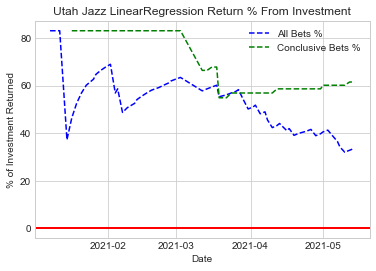

Appending done


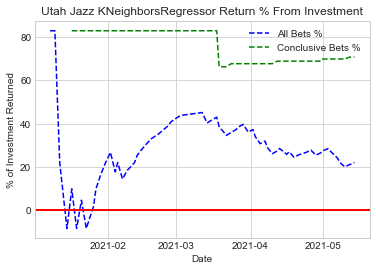

Appending done


In [3]:
Team = ["Utah Jazz"]
regressorlist = ["LinearRegression", "KNeighborsRegressor"]

multimodelcomparision(Team, regressorlist)

# <u> View a teams season predictions game by game </u>

Run "runteamseasonpredictor()" to generate a CSV into the DATA folder which is a DF with the detail for each game, under the name of the team and "gamebygame". Returns a line graph of BetReturns over the season using the predictions made and separating all predictions from "Conclusive" predictions.

Run "showtotalresultsforateam()" to a CSV into DATA and return the DF with the teams season predictions and bet return results.

### **The function can also be called from the Streamlit app.**

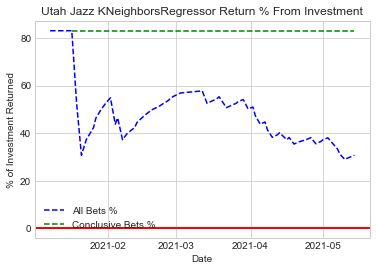

Appending done
             Regressor  ContainsNotConclusivePred  Totalgames  TotalCorrect  \
0  KNeighborsRegressor                       True          63            45   
1  KNeighborsRegressor                      False          13            13   

   BetReturn BetProfit  
0      19.35    30.71%  
1      10.79    83.00%  


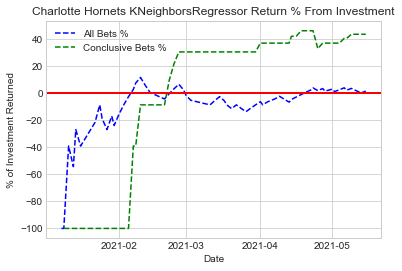

Appending done
             Regressor  ContainsNotConclusivePred  Totalgames  TotalCorrect  \
0  KNeighborsRegressor                       True          62            34   
1  KNeighborsRegressor                      False          13            10   

   BetReturn BetProfit  
0       0.22     0.35%  
1       5.30    40.77%  


'Done'

In [4]:
Teamlist = ["Utah Jazz", "Charlotte Hornets"]
regressor = "KNeighborsRegressor"
eon = 4 #eon means ESTIMATOR (used in RandomForestRegressor, recommend 100), CRITERION (used in DecisionTreeRegressor, recommend mse) or
        #N_NEIGHBORS (used in KNeighborsRegressor, recommend 4)

runteamseasonpredictor(Teamlist, regressor, eon, returnsummary=True)

# <u>Run function that takes a regressor or a list of regressors and then a variable to simulate the season and store the overall results in csv and mySQL </u>
The function simulates the whole season from game 10, game by game, team by team.
For each game the program trains and fits each model and makes a prediction using information from the previous 10 games.
The prediction made for each game is whether the predicted team score will be greater or lower than the bookies prediction.
If this prediction was correct, then that game would win the 1€ bet (returns 0.83€ as the odds are 1.83), if the prediction loses, then the 1€ bet is lost.
The teams results are stored in a dataframe to then be inserted into another function which totals up the columns and appends the overall results for the regressor and variable into a csv file and into a mySQL table named prediction.

For each game and each team <u>(1860 games)</u> a model is fitted with the scores available from the previous 10 games. This means that not every model is saved. The first model is saved in the MODELS folder.

## The following regressors can be used:
BayesianRidge

DecisionTreeRegressor

GaussianProcessRegressor

GradientBoostingRegressor

KNeighborsRegressor

LinearRegression

RadiusNeighborsRegressor

RandomForestRegressor

RidgeCV

SVR

### **This function can also be called from the Streamlit app.**

DecisionTreeRegressor
Model Pickle Saved


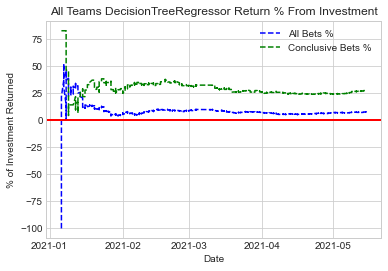

Appending done
Model result appended to prediction table in database
Appending done


'Done'

In [3]:
regressor = ["DecisionTreeRegressor"]
eon = "mae" #eon means ESTIMATOR (used in RandomForestRegressor, recommend 100), CRITERION (used in DecisionTreeRegressor, recommend mse) or
        #N_NEIGHBORS (used in KNeighborsRegressor, recommend 4)

runfullseasonpredictor(regressor, eon)

# <u>View these DataFrames from either DATA csv files or from mySQL:</u>

Cleaned dataset without % formats and without unnecessary columns.

Overall Model Results

### **This function can also be called from the Streamlit app.**

In [ ]:
opennbacsv("nbaclean.csv")

In [ ]:
getfullnbatablefromsql()

In [ ]:
openmodelresults("modelresults.csv")

In [ ]:
getpredictiontablefromsql()